In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from matplotlib.ticker import LogLocator
from scipy.stats import skew, kurtosis
from scipy.special import factorial
from scipy.optimize import curve_fit

In [3]:
def load_data(path):
  data = []
  
  with open(path, 'r') as file:
    for _ in range(5):
      next(file)

    for line in file:
      columns = line.split(";")
      data.append(int(columns[0]))
      
  data = np.array(data)
  data = data - data[0]
    
  return data

In [4]:
spinning0 = load_data("Data/Spinning_wheel/Part_0.txt")
spinning1 = load_data("Data/Spinning_wheel/Part_1.txt")
spinning2 = load_data("Data/Spinning_wheel/Part_2.txt")
spinning_old = load_data("Data/Spinning_wheel/Old.txt")

static0 = load_data("Data/Static_wheel/Part_0.txt")
static1 = load_data("Data/Static_wheel/Part_1.txt")
static2 = load_data("Data/Static_wheel/Part_2.txt")

In [5]:
norm_data1 = np.diff(static0)
norm_data2 = np.diff(spinning_old)

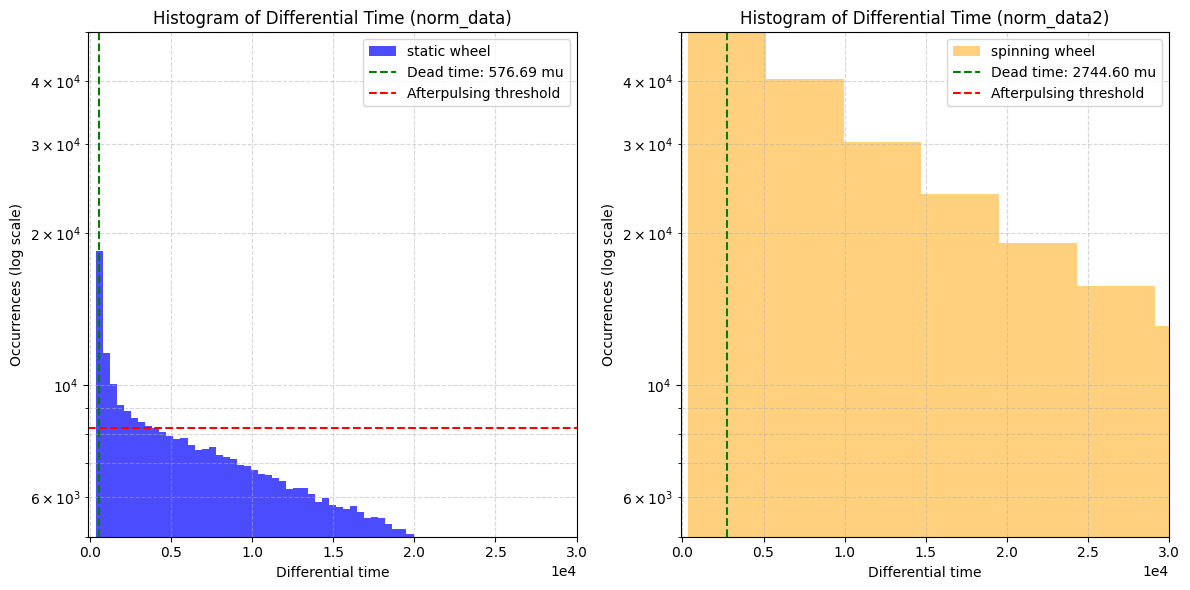

Dead time static: 4.6711647000000005e-08
Dead time spinning: 2.2231276199999997e-07


In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First histogram (norm_data) in the first subplot
counts1, bin_edges1, _ = ax1.hist(norm_data1, bins=1000, log=True, color="blue", alpha=0.7, label="static wheel")
first_bin_center1 = (bin_edges1[0] + bin_edges1[1]) / 2
ax1.axvline(first_bin_center1, color="green", linestyle="--", label=f"Dead time: {first_bin_center1:.2f} mu")
bin_index1 = np.digitize(3900, bin_edges1) - 1
if 0 <= bin_index1 < len(counts1):
    bin_height1 = counts1[bin_index1]
    ax1.axhline(y=bin_height1, color="red", linestyle="--", label="Afterpulsing threshold")
ax1.set_xlabel("Differential time")
ax1.set_ylabel("Occurrences (log scale)")
ax1.set_title("Histogram of Differential Time (norm_data)")
ax1.grid(which="both", linestyle="--", alpha=0.5)
ax1.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax1.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))
ax1.legend()
ax1.set_xlim(-100, 30000)
ax1.set_ylim(5000, 50000)

# Second histogram (norm_data2) in the second subplot
counts2, bin_edges2, _ = ax2.hist(norm_data2, bins=1000, log=True, color="orange", alpha=0.5, label="spinning wheel")
first_bin_center2 = (bin_edges2[0] + bin_edges2[1]) / 2
ax2.axvline(first_bin_center2, color="green", linestyle="--", label=f"Dead time: {first_bin_center2:.2f} mu")
bin_index2 = np.digitize(3900, bin_edges2) - 1
if 0 <= bin_index2 < len(counts2):
    bin_height2 = counts2[bin_index2]
    ax2.axhline(y=bin_height2, color="red", linestyle="--", label="Afterpulsing threshold")
ax2.set_xlabel("Differential time")
ax2.set_ylabel("Occurrences (log scale)")
ax2.set_title("Histogram of Differential Time (norm_data2)")
ax2.grid(which="both", linestyle="--", alpha=0.5)
ax2.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax2.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))
ax2.legend()
ax2.set_xlim(-100, 30000)
ax2.set_ylim(5000, 50000)

plt.tight_layout()
plt.show()

print(f"Dead time static: {first_bin_center1 * 81 * 1E-12}")
print(f"Dead time spinning: {first_bin_center2 * 81 * 1E-12}")

In [7]:
counts1 = counts1[bin_index1:]
bin_edges1 = bin_edges1[bin_index1:]
bin_edges1 = bin_edges1 - bin_edges1[0]

counts2 = counts2[bin_index2:]
bin_edges2 = bin_edges2[bin_index2:]
bin_edges2 = bin_edges2 - bin_edges2[0]

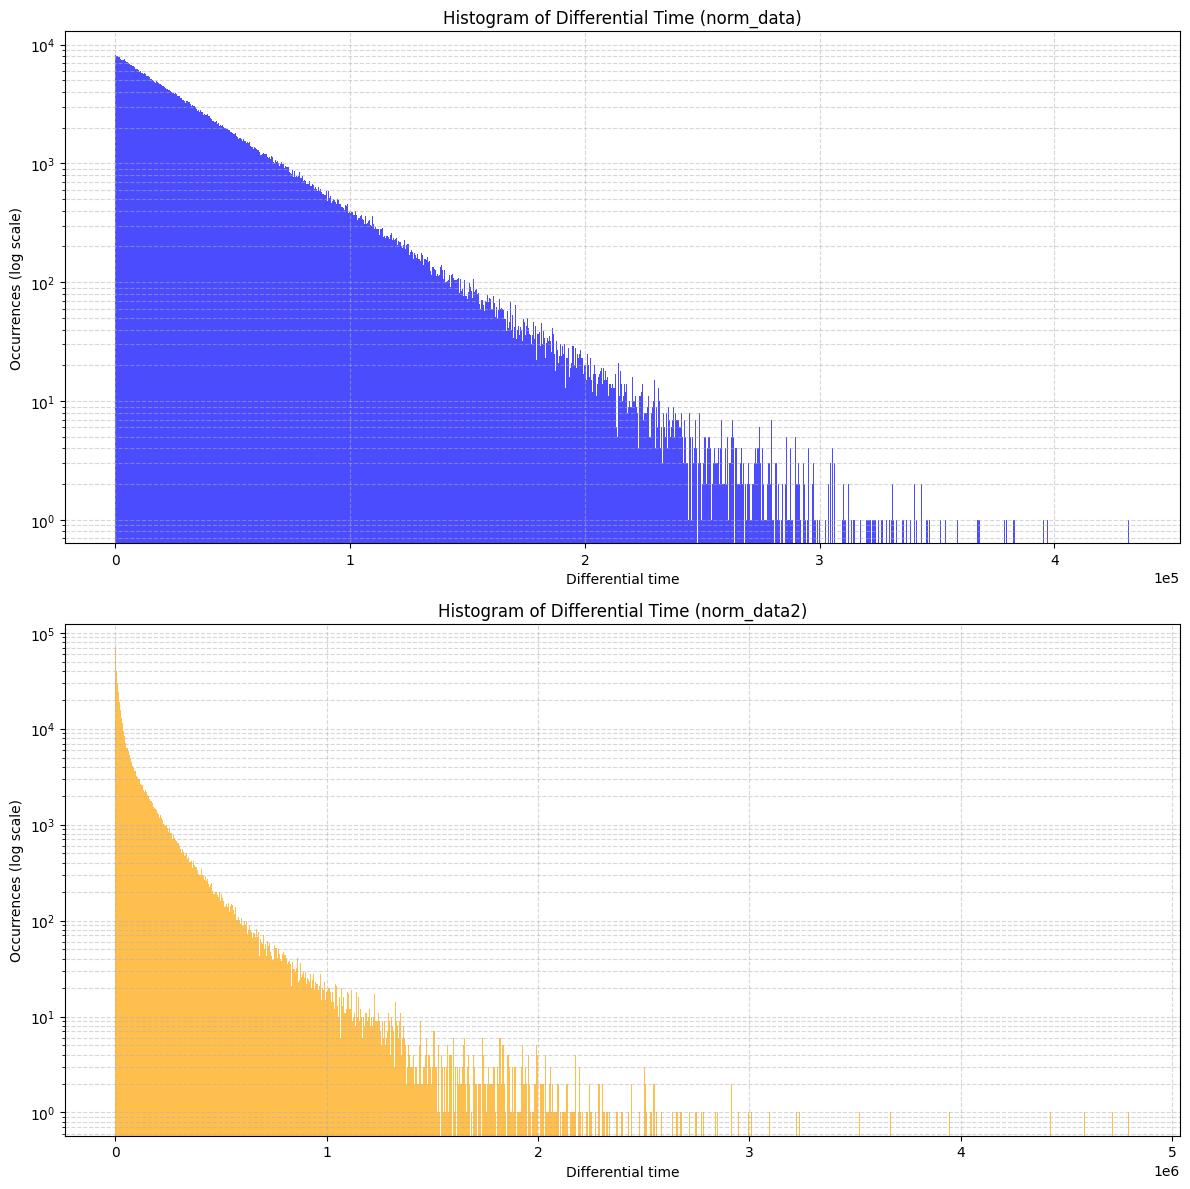

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# First histogram (norm_data)
ax1.hist(bin_edges1[:-1], bins=bin_edges1, weights=counts1, log=True, color='blue', alpha=0.7)
ax1.set_xlabel('Differential time')
ax1.set_ylabel('Occurrences (log scale)')
ax1.set_title('Histogram of Differential Time (norm_data)')
ax1.grid(which='both', linestyle='--', alpha=0.5)
ax1.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax1.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))

# Second histogram (norm_data2)
ax2.hist(bin_edges2[:-1], bins=bin_edges2, weights=counts2, log=True, color='orange', alpha=0.7)
ax2.set_xlabel('Differential time')
ax2.set_ylabel('Occurrences (log scale)')
ax2.set_title('Histogram of Differential Time (norm_data2)')
ax2.grid(which='both', linestyle='--', alpha=0.5)
ax2.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax2.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))

plt.tight_layout()
plt.show()

In [9]:
def counter(data, threshold):
  counts = []
  total_time = 0
  count = 0

  for time in data:
      total_time += time

      if total_time <= threshold:
          count += 1
      else:
          counts.append(count)
          total_time = 0
          count = 0

  if count > 0:
      counts.append(count)

  return np.array(counts)

In [10]:
deltaT = 10e6 / 81
count_static = counter(norm_data1, deltaT)
count_spinning = counter(norm_data2, deltaT)

print(max(count_static))
print(max(count_spinning))

16
51


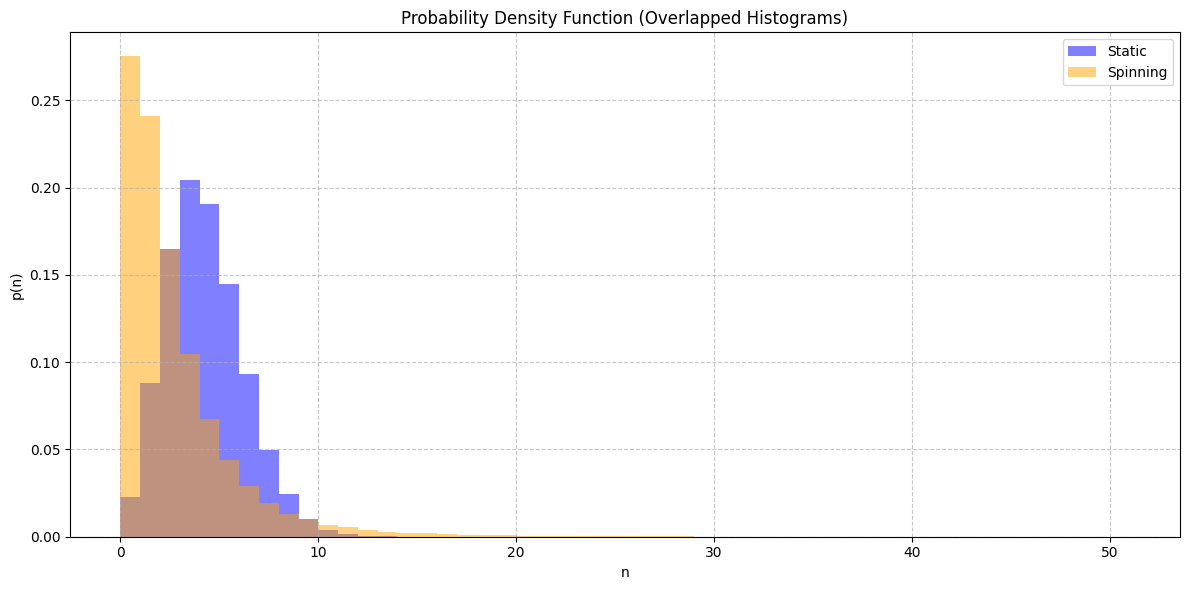

In [11]:
plt.figure(figsize=(12, 6))

plt.hist(count_static, bins=max(count_static), density=True, color='blue', alpha=0.5, label='Static')
plt.hist(count_spinning, bins=max(count_spinning), density=True, color='orange', alpha=0.5, label='Spinning')

plt.xlabel('n')
plt.ylabel('p(n)')
plt.title('Probability Density Function (Overlapped Histograms)')

plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
print("Statistics for static wheel:\n")
print(f"Mean: {np.mean(count_static)}")
print(f"Variance: {np.var(count_static)}")
print(f"Skewness: {skew(count_static)}")
print(f"Kurtosis: {kurtosis(count_static)}")

print("\n\nStatistics for spinning wheel:\n")
print(f"Mean: {np.mean(count_spinning)}")
print(f"Variance: {np.var(count_spinning)}")
print(f"Skewness: {skew(count_spinning)}")
print(f"Kurtosis: {kurtosis(count_spinning)}")

Statistics for static wheel:

Mean: 3.779037649839608
Variance: 3.848085989296655
Skewness: 0.5328788009431422
Kurtosis: 0.2820593052810305


Statistics for spinning wheel:

Mean: 2.3161389529600895
Variance: 9.186559272786852
Skewness: 3.260811260382919
Kurtosis: 18.50973353855532


In [13]:
def p_thermal(n, mean):
  return (1 / (mean + 1)) * (mean / (mean + 1))**n

def p_coherent(n, mean):
  return ((mean**n) * np.exp(-mean)) / factorial(n)

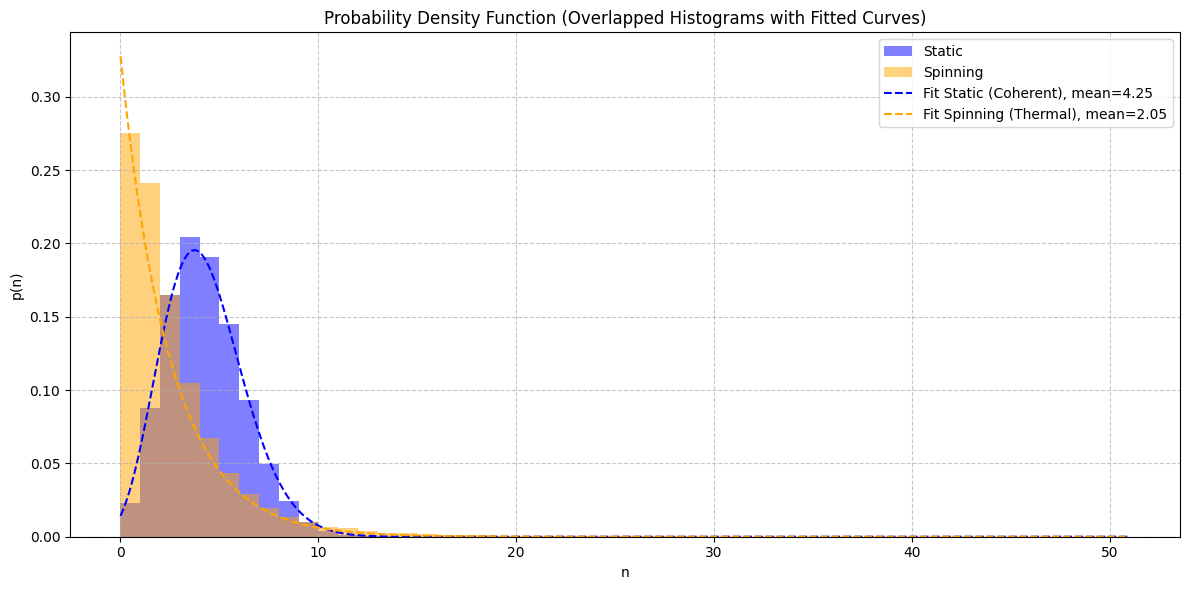

In [14]:
plt.figure(figsize=(12, 6))

counts_static, bin_edges_static, _ = plt.hist(count_static, bins=max(count_static), density=True, color='blue', alpha=0.5, label='Static')
counts_spinning, bin_edges_spinning, _ = plt.hist(count_spinning, bins=max(count_spinning), density=True, color='orange', alpha=0.5, label='Spinning')

bin_centers_static = (bin_edges_static[:-1] + bin_edges_static[1:]) / 2
bin_centers_spinning = (bin_edges_spinning[:-1] + bin_edges_spinning[1:]) / 2

popt_coherent_static, _ = curve_fit(p_coherent, bin_centers_static, counts_static, p0=[5.0])
popt_thermal_spinning, _ = curve_fit(p_thermal, bin_centers_spinning, counts_spinning, p0=[1.0])

mean_coherent_static = popt_coherent_static[0]
mean_thermal_spinning = popt_thermal_spinning[0]

n_vals_static = np.arange(0, max(count_spinning), 0.1)
n_vals_spinning = np.arange(0, max(count_spinning), 0.1)
plt.plot(n_vals_static, p_coherent(n_vals_static, mean_coherent_static), color='blue', linestyle='--', label=f'Fit Static (Coherent), mean={mean_coherent_static:.2f}')
plt.plot(n_vals_spinning, p_thermal(n_vals_spinning, mean_thermal_spinning), color='orange', linestyle='--', label=f'Fit Spinning (Thermal), mean={mean_thermal_spinning:.2f}')

plt.xlabel('n')
plt.ylabel('p(n)')
plt.title('Probability Density Function (Overlapped Histograms with Fitted Curves)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

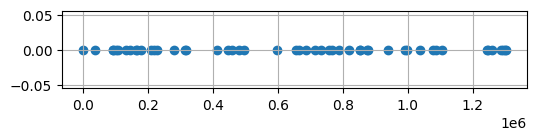

In [15]:
plt.figure(figsize=(6, 1))
plt.scatter(static0[:50], np.zeros(50))
plt.grid()
plt.show()

In [16]:
static0_diff = np.diff(static0)
static1_diff = np.diff(static1)
static2_diff = np.diff(static2)
static = np.concatenate((static0_diff, static1_diff, static2_diff))
static = static[static > 3900]

In [25]:
def bits_to_byte(bits):
  byte = 0
  for bit in bits:
    byte = (byte << 1) | bit
  return byte
  
def qrng(data):
  bits_list = []
  bytes_list = []
  i = 1
  while i < len(data):
    bits_list.append(int(data[i] > data[i-1]))
    i += 2

  bits_list = np.array(bits_list)
  
  for i in range(0, len(bits_list), 8):
    byte_chunk = bits_list[i:i+8]
    if len(byte_chunk) == 8:
      bytes_list.append(bits_to_byte(byte_chunk))
  
  return bytes_list

In [26]:
bytes_list = qrng(static)

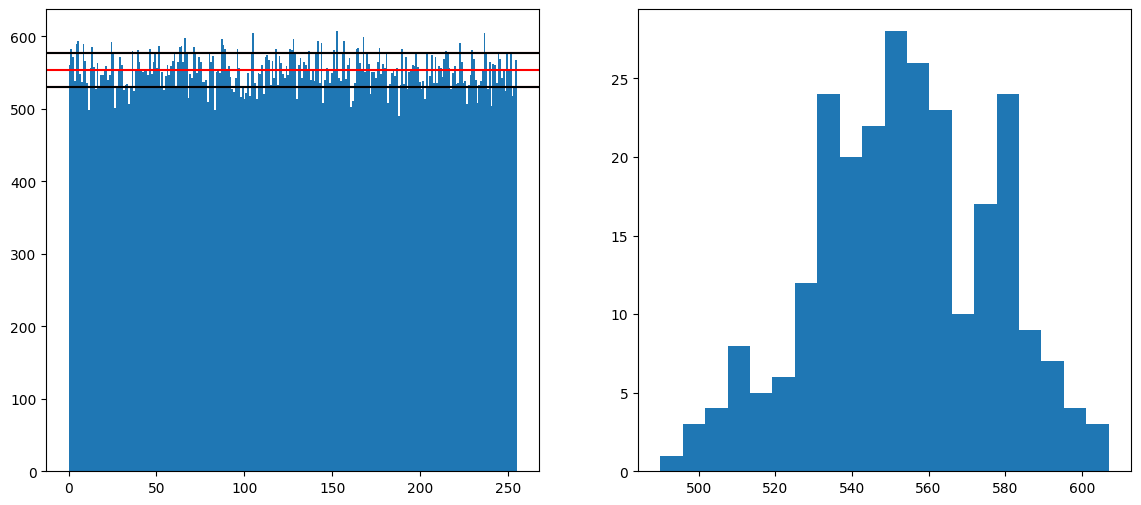

Bytes:
Mean: 127.32900680387341, Standard Deviation: 73.84631855171854

Counts:
Mean: 553.453125, Standard Deviation: 23.338494011704675


In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

counts_qrng, bin_edges_qrng, _ = ax1.hist(bytes_list, bins=max(bytes_list)+1)
mean_qrng = np.mean(counts_qrng)
std_qrng = np.std(counts_qrng)

# Plotting mean and standard deviation lines
ax1.axhline(y=mean_qrng, color='r')
ax1.axhline(y=mean_qrng - std_qrng, color='r')
ax1.axhline(y=mean_qrng + std_qrng, color='r')
ax1.axhline(y=mean_qrng - np.sqrt(mean_qrng), color='k')
ax1.axhline(y=mean_qrng + np.sqrt(mean_qrng), color='k')

ax2.hist(counts_qrng, bins=20)

plt.show()

print(f'Bytes:\nMean: {np.mean(bytes_list)}, Standard Deviation: {np.std(bytes_list)}\n')
print(f'Counts:\nMean: {mean_qrng}, Standard Deviation: {std_qrng}')

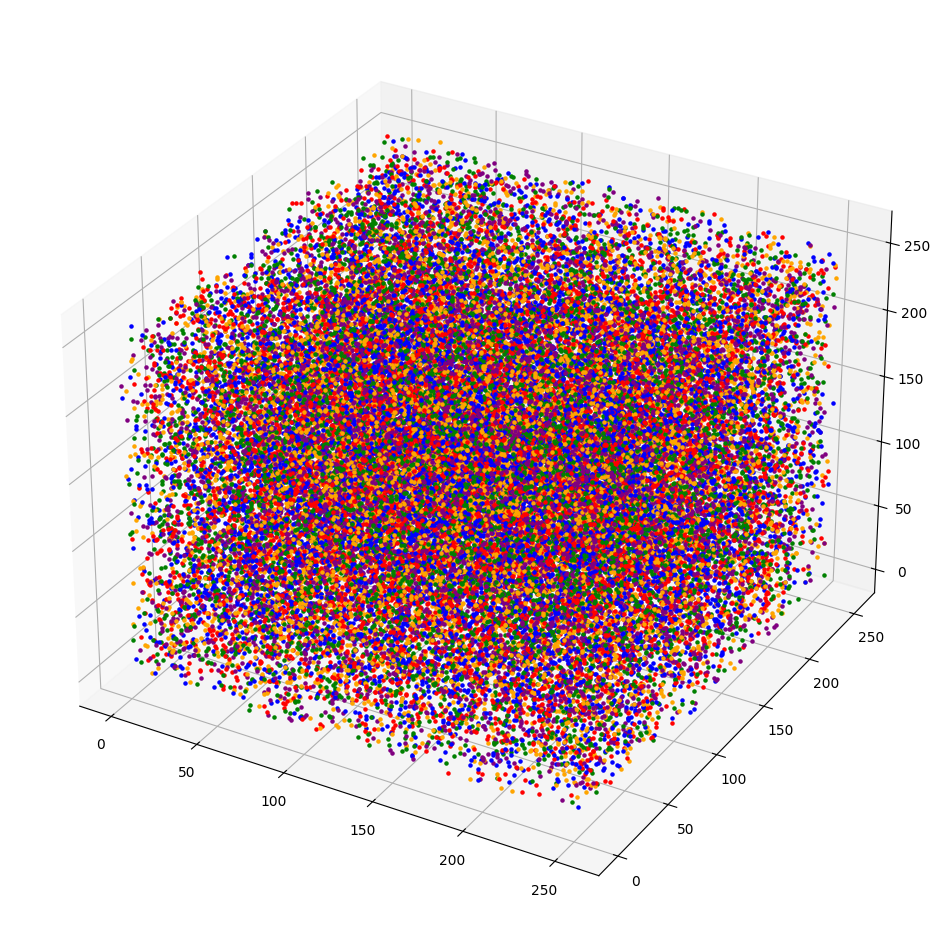

In [33]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
colors = ['r', 'b', 'g', 'orange', 'purple']

k = 0
while k < len(bytes_list) - 2:
  color = random.choice(colors)
  ax.scatter(bytes_list[k], bytes_list[k+1], bytes_list[k+2], c=color, marker='.')
  k += 3

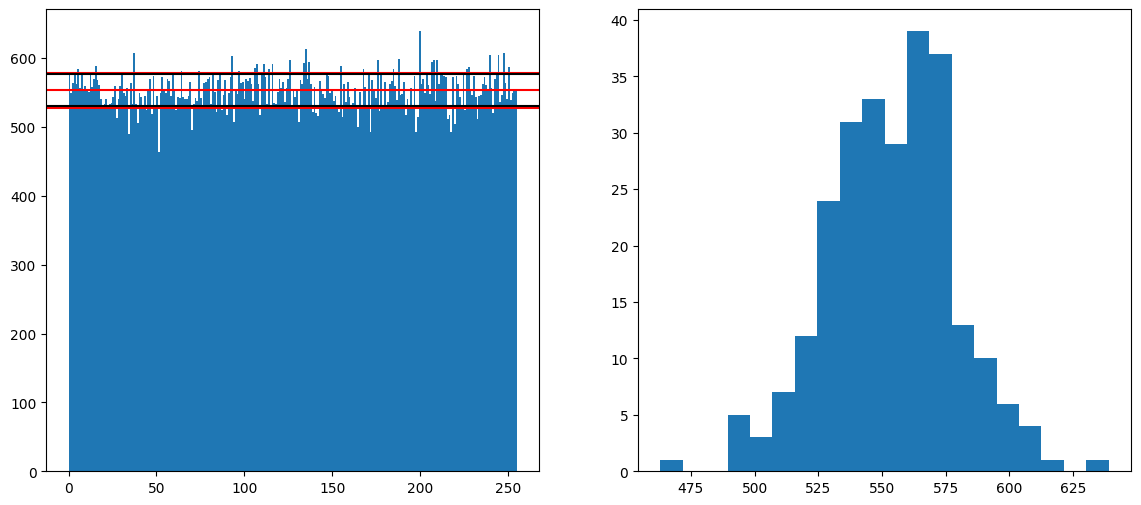

Bytes:
Mean: 127.73205866576325, Standard Deviation: 73.97514728393219

Counts:
Mean: 553.453125, Standard Deviation: 23.338494011704675


In [24]:
random_elements = np.random.choice(np.arange(256), size=len(bytes_list), replace=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

counts_prng, bin_edges_prng, _ = ax1.hist(random_elements, bins=max(random_elements)+1)
mean_prng = np.mean(counts_prng)
std_prng = np.std(counts_prng)

# Plotting mean and standard deviation lines
ax1.axhline(y=mean_prng, color='r')
ax1.axhline(y=mean_prng - std_prng, color='r')
ax1.axhline(y=mean_prng + std_prng, color='r')
ax1.axhline(y=mean_prng - np.sqrt(mean_prng), color='k')
ax1.axhline(y=mean_prng + np.sqrt(mean_prng), color='k')

ax2.hist(counts_prng, bins=20)

plt.show()

print(f'Bytes:\nMean: {np.mean(random_elements)}, Standard Deviation: {np.std(random_elements)}\n')
print(f'Counts:\nMean: {mean_qrng}, Standard Deviation: {std_qrng}')

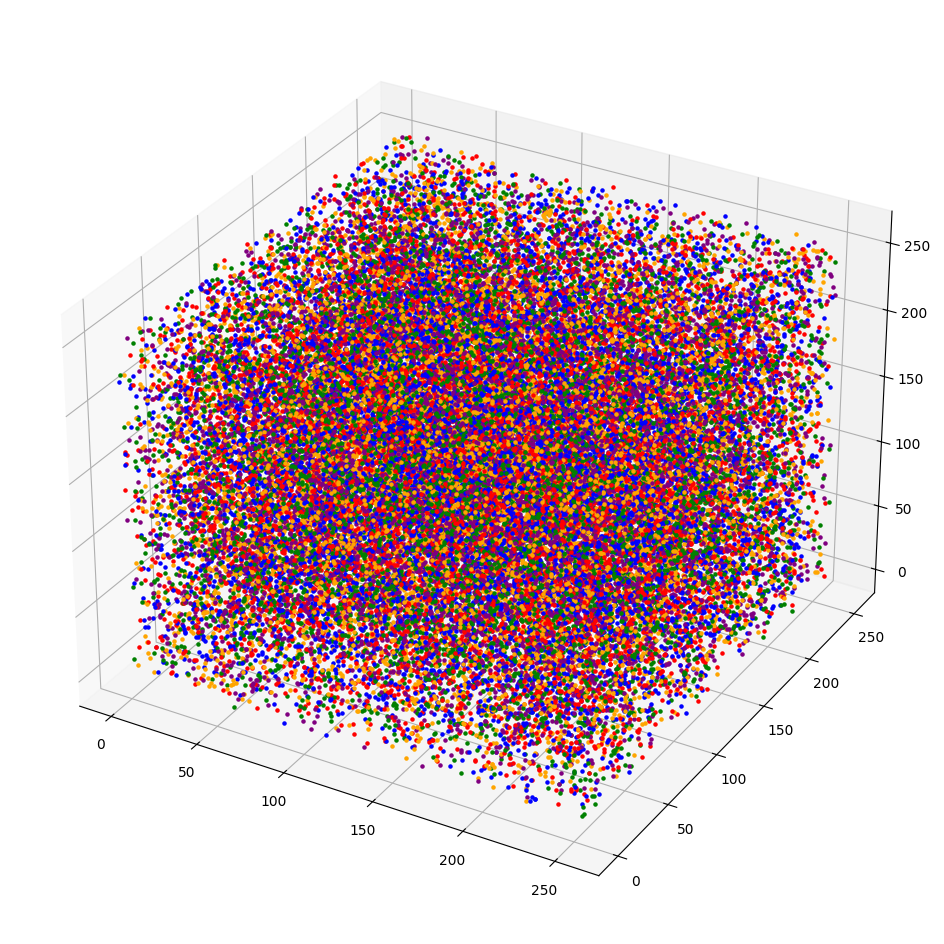

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
colors = ['r', 'b', 'g', 'orange', 'purple']

k = 0
while k < len(random_elements) - 2:
  color = random.choice(colors)
  ax.scatter(random_elements[k], random_elements[k+1], random_elements[k+2], c=color, marker='.')
  k += 3

In [35]:
def bytes_to_int(byte_seq):
    """Convert a sequence of 3 bytes to a 24-bit integer."""
    return (byte_seq[0] << 16) | (byte_seq[1] << 8) | byte_seq[2]

def compute_pi_approximation(bytes_list):
    total_points = 0
    hits = 0
    k = 0
    
    # Loop through bytes_list in chunks of 6 bytes (3 bytes for X, 3 bytes for Y)
    while k < len(bytes_list) - 5:
        # Extract the X and Y coordinates from 6 bytes
        x_bytes = bytes_list[k:k+3]
        y_bytes = bytes_list[k+3:k+6]
        
        # Convert 3 bytes into 24-bit integers
        x = bytes_to_int(x_bytes)
        y = bytes_to_int(y_bytes)
        
        # Normalize X and Y to the range [0, 1] by dividing by 2^24 (16777216)
        x_normalized = x / (2**24)
        y_normalized = y / (2**24)
        
        # Calculate the distance from the center (0.5, 0.5)
        distance = np.sqrt((x_normalized - 0.5)**2 + (y_normalized - 0.5)**2)
        
        # Check if the point is within the circle (radius = 0.5)
        if distance <= 0.5:
            hits += 1
        
        total_points += 1
        k += 6  # Move to the next 6-byte sequence
    
    # Calculate the percentage of hits
    hit_percentage = hits / total_points
    
    # Use the hit percentage to estimate Pi
    pi_estimate = hit_percentage * 4  # Area ratio of circle to square is Pi/4
    
    return pi_estimate, hit_percentage, total_points

# Assuming bytes_list is available, apply the function
pi_estimate, hit_percentage, total_points = compute_pi_approximation(bytes_list)

print(f"Estimated Pi: {pi_estimate}")
print(f"Hit percentage: {hit_percentage * 100:.2f}%")
print(f"Total points processed: {total_points}")

pi_estimate, hit_percentage, total_points = compute_pi_approximation(random_elements)

print(f"Estimated Pi: {pi_estimate}")
print(f"Hit percentage: {hit_percentage * 100:.2f}%")
print(f"Total points processed: {total_points}")


Estimated Pi: 3.1337342254594733
Hit percentage: 78.34%
Total points processed: 23614
Estimated Pi: 3.126111628694842
Hit percentage: 78.15%
Total points processed: 23614
